# Data Cleaning Project : U.S. Census Data

## Introduction

In this project, I will be creating a masterfile from smaller datasets, and then cleaning the masterfile. I will then use the cleaned masterfile to create a visualization.

## Inspect the Data & Creating the Masterfile

Below, I have imported each library I intend to use on this project, and import one of the small datasets to get a feel for the data. Fortunatley, each of the 10 data sets has the same number of variables, and the same format for each variable.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

states_0 = pd.read_csv('states0.csv')
states_0.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


Since it's just a question of getting all the data into one file at this time, I used the python library `glob` to create a list of each file name for the smaller dataset. I then looped through each file name in our 'globed' list and imported them to a dataframe to create a masterfile called' `us_census`.

After that, I examined each column name and their corresponding datatype to understand what types need to be changed. You can see that `Income` is an object datatype instead of an integer. This is due to there being a '$' in front of each number.

In [20]:
files = glob.glob("states*.csv")
df_list = []
for filename in files:
  us_census = pd.read_csv(filename)
  df_list.append(us_census)

In [21]:
print(us_census.columns)
print(us_census.dtypes)
print(us_census.head())

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object
   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74      

## Managing Datatypes and Format

To make `Income` more manageable, I removed the dollar sign from the column. Below, I used a regular expression to find a pattern of the dollar sign in the column and removed it from each cell. I then reassigned the newly formatted column back to the dataframe. This will allow me to plot `Income` correctly in the future.

In [22]:
us_census.Income = us_census['Income'].replace('[\$,]', '', regex=True)

The variable, `GenderPop`, has both the population number of men and women and a letter representing each. I split this column to make the numbers more manageable, and to give men and women their own column. This is better for all around format and utility.

To do this, I first created two empty list that will receive each number and letter respetively. I then looped through a range from 0 to the length of the `GenderPop` and converted each cell into a string datatype. I did this because I wanted to use a sting splitting method and`GenderPop` was of type object. I then split the sting on `_` for each index. This allowed me to get the population numbers for men and women by themselves to append into their own columns. I did this by adding each population number to their respective empty list I made earlier, then set those equal to their columns.
   

In [23]:
print(us_census['GenderPop'].head())

Men = []
Women = []
for index in range(0,len(us_census["GenderPop"])):
    string = str(us_census['GenderPop'].iat[index])
    replace = string.split('_')
    Men.append(replace[0])
    Women.append(replace[1])

us_census['Men'] = Men
us_census['Women'] = Women

print(us_census.head())

0      2341093M_2489527F
1        384160M_349215F
2      3299088M_3342840F
3      1451913M_1506295F
4    19087135M_19334329F
Name: GenderPop, dtype: object
   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific     Income            GenderPop        Men      Women  
0   0.03%  43296.36     2341093M_2489527F   2341093M   2489527F  
1   1.06%  70354.74       384160M_349215F    384160M    349215F  
2   0.17%  54207.82     3299088M_3342840F   3299088M   3342840F  
3   0.15%  41935.63     1451913M_1506295F   1451913M   1506295F  
4   0.35%  67264.78   19087135M_1

From there, I needed to drop the `M` and `F` so I could just have the population numbers and convert them to numerical datatypes. For each variable, I looped through each cell individually and made them a string datatype. I then dropped the respective letter, `M` or `F`, and converted each column back to a numeric datatype. When I print the first five columns, you can see the respective columns. From here, I chose to keep `GenderPop` in case I need to use it in the future.

In [24]:
for index in range(0,len(us_census["Men"])):
    string = str(us_census['Men'].iat[index])
    replace = string.replace('M', '')
    us_census['Men'].iat[index] = replace
    
for index in range(0,len(us_census["Women"])):
    string = str(us_census['Women'].iat[index])
    replace = string.replace('F', '')
    us_census['Women'].iat[index] = replace
    
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093,2489527
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160,349215
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088,3342840
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913,1506295
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135,19334329


Below, you can see a scatter plot using the variables I just cleaned, `Income` and `Women`.

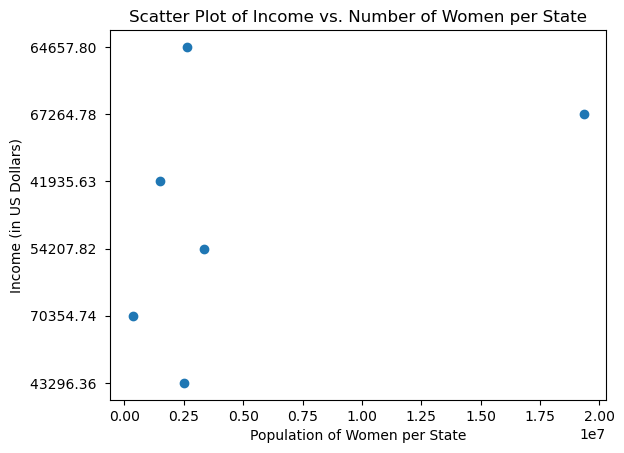

In [25]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()